In [1]:
from bigbang.archive import Archive
import bigbang.parse as parse
import bigbang.graph as graph
import bigbang.mailman as mailman
import bigbang.process as process
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
import pytz
import numpy as np
import math
import nltk
from itertools import repeat
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
from nltk.corpus import stopwords
import re

In [2]:
urls = ["http://mail.python.org/pipermail/ipython-dev/",
        "http://mail.scipy.org/pipermail/ipython-user/"]#,
        #"http://mail.python.org/pipermail/scipy-dev/",
        #"http://mail.python.org/pipermail/scipy-user/",
        #"http://mail.python.org/pipermail/numpy-discussion/"]


archives= [Archive(url,archive_dir="../../archives") for url in urls]

In [3]:
act = archives[0].get_activity()
act1 = archives[1].get_activity()

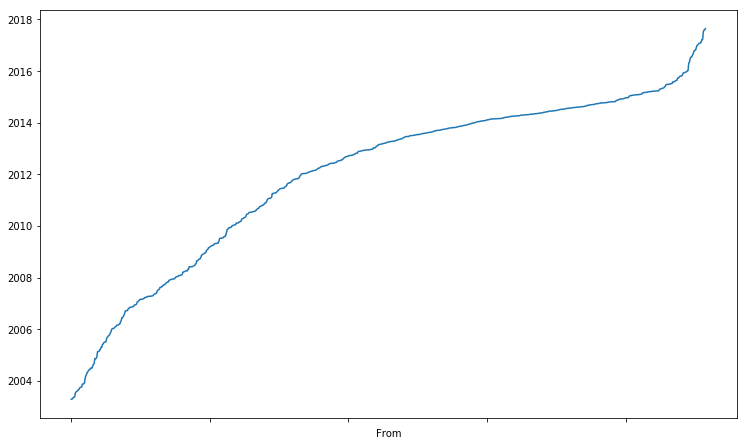

In [4]:
fig = plt.figure(figsize=(12.5, 7.5))

#act.idxmax().order().T.plot()
(act > 0).idxmax().sort_values().plot()

fig.axes[0].yaxis_date()

In [5]:
timeorder = (act > 0).idxmax().sort_values()
timeorder1 = (act1 > 0).idxmax().sort_values()

In [6]:
archives[1].data[:2]

,From,Subject,Date,In-Reply-To,References,Body
Message-ID,,,,,,
<3271DBB88437ED41A0AB239E6C2554A401117873@ussunm001.palmsource.com>,Robin.Siebler at palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 20:27:08+00:00,None,None,"I installed IPython-0.2.15pre3, played with it..."
<3271DBB88437ED41A0AB239E6C2554A401117873@ussunm001.palmsource.com>,Robin.Siebler@palmsource.com (Robin Siebler),[IPython-user] Crash,2003-03-27 20:27:08+00:00,None,None,"I installed IPython-0.2.15pre3, played with it..."


In [7]:
for row in archives[0].data[:2].iterrows():
    print row[1]["Body"]

Hi all,

after a suggestion by Jacek Generowicz, someone (not me) sent in a request for 
indexing the ipython lists at gmane.  I didn't do it but I'm perfectly happy 
with it, so thanks to whoever did it.

For those not familiar with the service, http://gmane.org provides a mailing 
list to news bridge, which allows you to follow the ipython lists with a news 
reader.

Cheers,

Fernando.
Hi Cory,

> Done.  install command will now work with distutils 1.02; bdist_wininst
> --install-script=ipython_post_install.py will also work with distutils
> 1.03.

I finally got around to implementing your patches for Windows installation 
(sorry for the huge delay).  I work under RedHat 8.0, and I can get the 
wininst target to build me a nice .exe installer, but unfortunately it doesn't 
seem to execute the post-install script at all.  If I run the setup.py from 
inside the zip target, it's ok: the post-installer gets loaded via regular 
python code, just as it did before.

But under distutils 1.0.

In [8]:
arx = archives[0]

In [9]:
k = pd.DataFrame

In [10]:
first_participation = {}
for row in archives[0].data.iterrows():
    if row[1]["From"] not in first_participation:
        first_participation[row[1]["From"]] = row[1]["Date"]

In [11]:
first_participation1 = {}
for row in archives[1].data.iterrows():
    if row[1]["From"] not in first_participation1:
        first_participation1[row[1]["From"]] = row[1]["Date"]

In [12]:
#First list
wordcount={}
for row in archives[0].data.iterrows():
    if row[1]["Body"] is None:
        continue
    
    w = row[1]["Body"].replace("'", "")
    k = re.sub(r'[^\w]', ' ', w)
    t = nltk.tokenize.word_tokenize(k)
    for g in t:
        try:
            word = st.stem(g)
        except:
            print g
            pass
        if word in stopwords.words('english'):
            continue
        if word not in wordcount:
            wordcount[word] = [1]
            wordcount[word].append(row[0])
            wordcount[word].append(row[1]["Date"])
            wordcount[word].append(row[1]["From"])
            wordcount[word].append(row[1]["In-Reply-To"])
        else:
            wordcount[word][0] += 1
wd = wordcount #In case

In [14]:
#Second List
wordcount1={}
for row in archives[1].data.iterrows():
    if row[1]["Body"] is None:
        continue
    
    w = row[1]["Body"].replace("'", "")
    k = re.sub(r'[^\w]', ' ', w)
    t = nltk.tokenize.word_tokenize(k)
    for g in t:
        try:
            word = st.stem(g)
        except:
            print g
            pass
        if word in stopwords.words('english'):
            continue
        if word not in wordcount1:
            wordcount1[word] = [1]
            wordcount1[word].append(row[0])
            wordcount1[word].append(row[1]["Date"])
            wordcount1[word].append(row[1]["From"])
            wordcount1[word].append(row[1]["In-Reply-To"])
        else:
            wordcount1[word][0] += 1

In [15]:
#new_df = pd.DataFrame(wordcount.items(),columns=["Word","Others"])

In [16]:
#pd.concat(pd.Series(wordcount.keys()),pd.DataFrame(wordcount.values(),columns=["A","B","C","D","E"]))

In [17]:
#Wordcount information dataframe, with rows as words.
asd = pd.DataFrame(wordcount)
new_dataframe = asd.transpose()
new_dataframe.columns = ["Wordcount", "Message-ID", "Date","From","In-Reply-To"]

In [18]:
#Wordcount information dataframe, with rows as words.
asd1 = pd.DataFrame(wordcount1)
new_dataframe1 = asd1.transpose()
new_dataframe1.columns = ["Wordcount", "Message-ID", "Date","From","In-Reply-To"]

In [19]:
len(wordcount) #Number of unique words in mailing list1

42241

In [20]:
len(wordcount1) #Number of unique words in mailing list2

46113

In [21]:
#Number of same unique words in two mailing lists
samewordcount=0
for word in wordcount:
    if word in wordcount1:
        samewordcount += 1
samewordcount

15346

In [22]:
#Total number of same words that are introduced by same people.
samecount = 0
for word in wordcount:
    if word in wordcount1:
        if wordcount[word][3] == wordcount1[word][3]:
            samecount += 1
samecount

1452

In [23]:
#Among 100-500 appearance words, the number of common words between two mailing-list.
samewordcount = 0
for word in wordcount:
    if wordcount[word][0] >= 100 and wordcount[word][0] <= 500:
        if word in wordcount1:
            if wordcount1[word][0] >= 100 and wordcount1[word][0] <= 500:
                samewordcount += 1
samewordcount

758

In [24]:
#Among 100-500 appearance words, the number of common words between two mailing-list that are first
#introduced by same people
same_person_count = 0
for word in wordcount:
    if wordcount[word][0] >= 100 and wordcount[word][0] <= 500:
        if word in wordcount1:
            if wordcount1[word][0] >= 100 and wordcount1[word][0] <= 500:
                if wordcount[word][3] == wordcount1[word][3]:
                    #print word
                    same_person_count += 1
samecount

1452

In [25]:
#common word list(introduced by different people in different lists)
commonwords = {}
for word in wordcount:
    if wordcount[word][0] >= 100 and wordcount[word][0] <= 500:
        if word in wordcount1:
            if wordcount1[word][0] >= 100 and wordcount1[word][0] <= 500:
                if wordcount[word][3] != wordcount1[word][3]:
                    commonwords[word] = [wordcount[word][0],wordcount[word][3],wordcount[word][2],\
                                         wordcount1[word][0],wordcount1[word][3],wordcount1[word][2]]
        

In [26]:
len(commonwords)

621

In [27]:
#Dataframe of information of those words introduced by different people
df1 = pd.DataFrame(commonwords)
commonword_differentauthor_dataframe = df1.transpose()
commonword_differentauthor_dataframe.columns = ["Wordcount1", "From1", "Date1","Wordcount2", "From2", "Date2"]
commonword_differentauthor_dataframe[:10]

,Wordcount1,From1,Date1,Wordcount2,From2,Date2
000,110,cggame at consultant.com (Van Dyke),2003-08-30 11:44:50+00:00,105,thomashadim99 at netscape.net (Ciwen),2003-10-19 15:00:32+00:00
0200,351,ipython at ml.schieke.net (Jaco Schieke),2004-08-02 23:00:59+00:00,348,ero at dkbza.org (Ero Carrera),2004-05-09 08:11:36+00:00
0700,445,gb at cs.unc.edu (Gary Bishop),2003-12-03 16:00:47+00:00,446,fperez@colorado.edu (Fernando Perez),2003-05-30 18:45:15+00:00
1000,135,cmoad at indiana.edu (Charles Moad),2005-02-21 14:46:59+00:00,177,gillet@scripps.edu (Alexandre Gillet),2003-08-20 00:34:07+00:00
2003,103,cdodt at fcoe.k12.ca.us (Cory Dodt),2003-04-17 14:32:56+00:00,167,Robin.Siebler at palmsource.com (Robin Siebler),2003-03-27 21:13:13+00:00
2005,198,Fernando.Perez at colorado.edu (Fernando Perez),2005-01-24 00:56:15+00:00,440,jjl at pobox.com (John J Lee),2004-12-31 10:49:16+00:00
2007,445,vivainio at gmail.com (Ville M. Vainio),2007-01-17 18:19:08+00:00,442,bthom at cs.hmc.edu (belinda thom),2007-01-08 05:36:13+00:00
35,459,Fernando.Perez at colorado.edu (Fernando Perez),2004-06-21 07:58:21+00:00,453,sigurd at 12move.de (Karl =?iso-8859-1?q?Pfl=E...,2003-08-14 20:55:49+00:00
36,439,ariciputi at pito.com (Andrea Riciputi),2004-11-10 08:38:31+00:00,475,gb@cs.unc.edu (Gary Bishop),2003-05-17 11:52:37+00:00
38,416,mantegazza at ill.fr (=?iso-8859-15?q?Fr=E9d=E...,2005-03-17 12:18:23+00:00,442,sigurd at 12move.de (Karl =?iso-8859-1?q?Pfl=E...,2003-08-14 20:55:49+00:00


In [28]:
commonword_differentauthor_dataframe['Date1'][0] < commonword_differentauthor_dataframe['Date1'][1]

True

In [29]:
len(commonwords)

621

In [30]:
# The list of words that have potential of idea flows. Definition: A is introduced by p in list1 first, then q saw it and then 
# introduced the word A to list 2, vice versa. We defined q saw as q said sth in list1 before p poped out the word. 
# Total list of such word A. 
time_influence = 0
influnce_list = {}
for word in commonwords:
    if commonwords[word][2] > commonwords[word][5]: #Author2 comes first
        if commonwords[word][1] in first_participation1: #Check if author1 in list2
            if first_participation1[commonwords[word][1]] < commonwords[word][5]: #Check if author1\
                #in list2 and exists before the word first introduced in list2
                influnce_list[word] = commonwords[word]
                time_influence += 1
    else: #Author1 comes first
        if commonwords[word][4] in first_participation:
            if first_participation[commonwords[word][4]] < commonwords[word][2]:
                influnce_list[word] = commonwords[word]
                time_influence += 1
            

In [31]:
time_influence

151

In [32]:
len(influnce_list.keys())

151

In [33]:
df2 = pd.DataFrame(influnce_list)
influnce_list_dataframe = df2.transpose()
influnce_list_dataframe.columns = ["Wordcount1", "From1", "Date1","Wordcount2", "From2", "Date2"]
influnce_list_dataframe[:20]

,Wordcount1,From1,Date1,Wordcount2,From2,Date2
0700,445,gb at cs.unc.edu (Gary Bishop),2003-12-03 16:00:47+00:00,446,fperez@colorado.edu (Fernando Perez),2003-05-30 18:45:15+00:00
2005,198,Fernando.Perez at colorado.edu (Fernando Perez),2005-01-24 00:56:15+00:00,440,jjl at pobox.com (John J Lee),2004-12-31 10:49:16+00:00
2007,445,vivainio at gmail.com (Ville M. Vainio),2007-01-17 18:19:08+00:00,442,bthom at cs.hmc.edu (belinda thom),2007-01-08 05:36:13+00:00
404,250,Fernando.Perez at colorado.edu (Fernando Perez),2006-01-16 18:29:09+00:00,147,mantegazza at ill.fr (=?iso-8859-15?q?Fr=E9d=E...,2005-04-06 03:12:39+00:00
52,389,ralf at brainbot.com (Ralf Schmitt),2003-09-22 14:30:47+00:00,351,fperez at colorado.edu (Fernando Perez),2004-04-10 14:45:23+00:00
_ip,192,vivainio at gmail.com (Ville Vainio),2006-01-30 21:18:54+00:00,174,oliphant.travis at ieee.org (Travis E. Oliphant),2006-01-24 23:11:40+00:00
ac,354,prabhu at aero.iitm.ernet.in (Prabhu Ramachand...,2004-09-29 17:16:03+00:00,201,jhsh@sun.ac.za (Jannie Hofmeyr),2003-08-29 09:34:13+00:00
acceiv,482,fperez at colorado.edu (Fernando Perez),2003-05-13 19:13:27+00:00,381,gb@cs.unc.edu (Gary Bishop),2003-05-13 19:11:30+00:00
admin,222,fperez at colorado.edu (Fernando Perez),2003-10-07 15:34:22+00:00,261,tony at tcapp.com (Tony Cappellini),2003-04-15 04:56:14+00:00
affect,334,pythondev-dang at lazytwinacres.net (Daniel 'D...,2004-06-24 19:04:24+00:00,187,Fernando.Perez at colorado.edu (Fernando Perez),2004-08-13 11:05:14+00:00


In [34]:
influence_words = influnce_list.keys()

In [35]:
#reduce the words that only contain numbers (lack of information)
reduced_influence_words = [] 
for word in influence_words:
    if word.isdigit() == False:
        reduced_influence_words.append(word)

In [36]:
len(reduced_influence_words)

146

In [37]:
reduced_influence_words[:20]

['decl',
 'osx',
 'tcp',
 'subprocess',
 'i386',
 'sleep',
 u'query',
 'perfect',
 'busy',
 'ver',
 'fit',
 u'temp',
 'pprint',
 'genutil',
 'desktop',
 'tb',
 'capt',
 'mpi',
 'mous',
 'mom']

In [38]:
#Store the list
import csv
with open('test123.csv', 'w') as fp:
    a = csv.writer(fp)
    data = [reduced_influence_words]
    a.writerows(data)

#reduced_influence_words.to_csv()